In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("weather.csv")

In [3]:
df

,Outlook,Temperature,Humidity,Windy,Golf Play
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [4]:
X = pd.get_dummies(df.drop("Golf Play",axis=1),drop_first=False)
X

,Windy,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal
0,False,0,1,0,0,1,0,1,0
1,True,0,1,0,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,0,1,0,0,1,1,0
4,False,0,0,1,1,0,0,0,1
5,True,0,0,1,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,1,0,0,0,1,1,0
8,False,0,1,0,1,0,0,0,1
9,False,0,0,1,0,0,1,0,1


In [5]:
y = df["Golf Play"]
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Golf Play, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
X.shape

(14, 9)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [11]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [12]:
base_preds = model.predict(X_test)

In [13]:
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [14]:
model.feature_importances_

array([0.31196216, 0.2309366 , 0.31196216, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14513909])

In [15]:
X.columns

Index(['Windy', 'Outlook_Overcast', 'Outlook_Rainy', 'Outlook_Sunny',
       'Temperature_Cool', 'Temperature_Hot', 'Temperature_Mild',
       'Humidity_High', 'Humidity_Normal'],
      dtype='object')

In [16]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=["Feature Importance"]).sort_values("Feature Importance")

,Feature Importance
Outlook_Sunny,0.000000
Temperature_Cool,0.000000
Temperature_Hot,0.000000
Temperature_Mild,0.000000
Humidity_High,0.000000
Humidity_Normal,0.145139
Outlook_Overcast,0.230937
Windy,0.311962
Outlook_Rainy,0.311962


In [17]:
from sklearn.tree import plot_tree

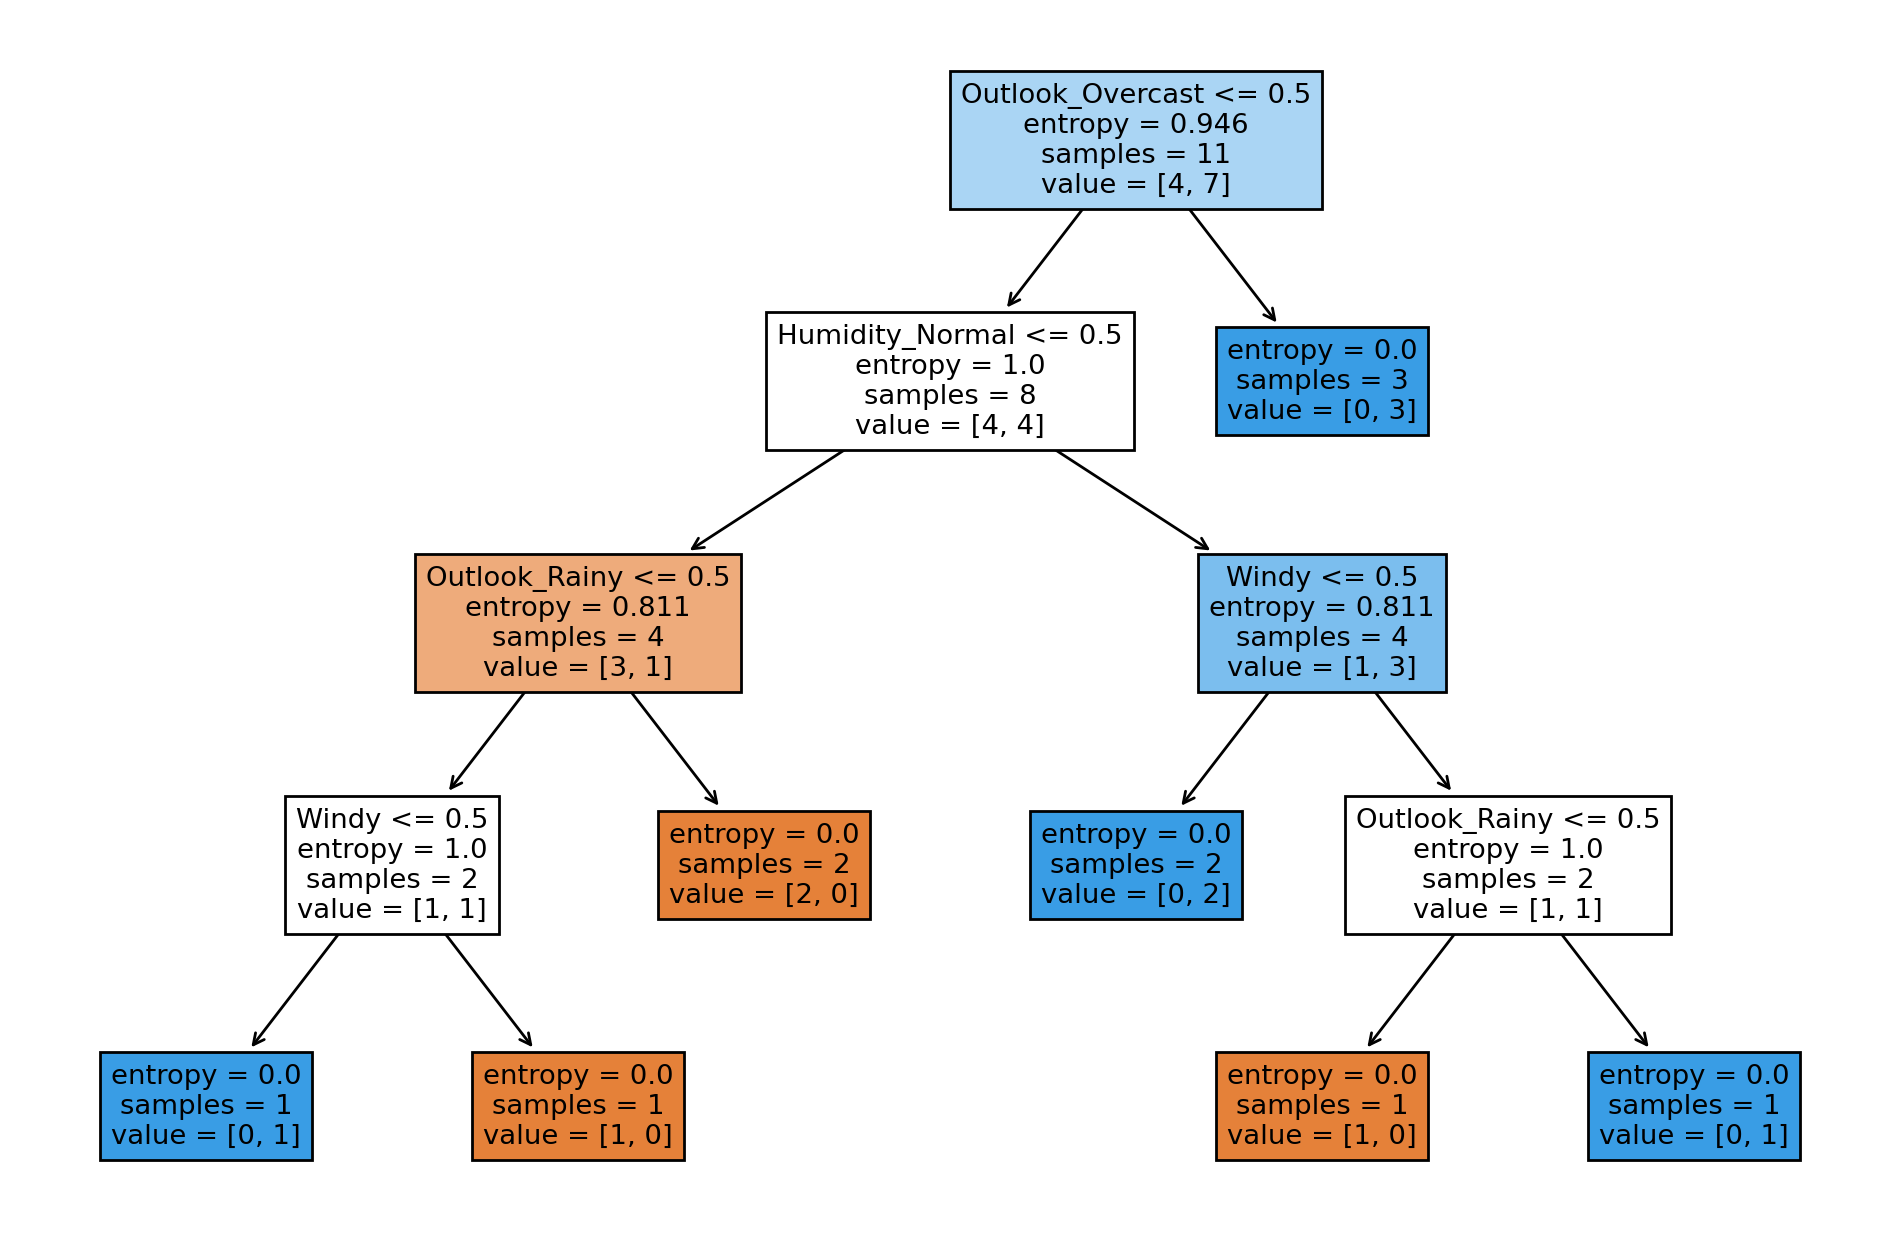

In [18]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model,feature_names=X.columns,filled=True);

### The decision tree keeps changing for each iteration because our model doesn't have enough features. The model is not reliable. 

### A good idea is instead of manually running the program several times and obtaining different performance each time, you can use Cross-validation instead.


### Refer the link for more details
https://datascience.stackexchange.com/questions/69934/decision-trees-change-result-at-every-run-how-can-i-trust-of-my-results